In [3]:
#!pip install simpletransformers

In [1]:
import os
import pandas as pd
import json
import gzip
import fasttext
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Book files
path = '../../src/data/schemafiltereddata/Book'
files = [file for file in os.listdir(path) if file.endswith('.json.gz')]

In [5]:
len(files)

978

Ausweiten auf alle die benutzt werden

In [7]:
# target columns in class Book
target_columns = ['name', 'author', 'isbn', 'description', 'publisher', 'offers','datepublished', 'numberofpages', 'bookformat', 
'inlanguage','genre', 'aggregaterating', 'url', 'bookedition', 'image', 'price','keywords', 'text', 
'review', 'about', 'exampleofwork']

In [23]:
# creation of general dataframe to hold data
book_tables = pd.DataFrame(columns=['text', 'name'])

In [24]:
for file in files:
# read file
    df = pd.read_json(os.path.join(path, '{}'.format(file)), compression='gzip', lines=True)

    # look for target columns
    for target in target_columns:
        if target in df.columns:
            print(target)
            df[target] = df[target].fillna(' ')
            try:
                book_tables = book_tables.append({'text': ' '.join(df[target].tolist()), 'name': target}, ignore_index=True)
            except:
                book_tables = book_tables.append({'text': ','.join(str(v) for v in df[target]), 'name': target}, ignore_index=True)
                print('There is not a prob anymore with: ', target)
            #book_tables.append({'text': ''.join(map(str, df[target])), 'name': target}, ignore_index=True)

name
author
There is not a prob anymore with:  author
description
publisher
offers
There is not a prob anymore with:  offers
bookedition
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
datepublished
genre
There is not a prob anymore with:  genre
url
price
name
author
There is not a prob anymore with:  author
description
publisher
offers
There is not a prob anymore with:  offers
bookedition
name
author
There is not a prob anymore with:  author
isbn
description
publisher
datepublished
name
author
There is not a prob anymore with:  author
isbn
publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
datepublished
genre
There is not a prob anymore with:  genre
url
price
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
publisher
Th

name
isbn
There is not a prob anymore with:  isbn
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
bookedition
name
author
There is not a prob anymore with:  author
isbn
publisher
There is not a prob anymore with:  publisher
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
inlanguage
about
name
author
isbn
description
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
genre
name
author
isbn
publisher
offers
There is not a prob anymore with:  offers
numberofpages
There is not a prob anymore with:  numberofpages
name
author
publisher
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
name
There is not a prob anymore with:  name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
There is not a prob an

name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
There is not a prob anymore with:  publisher
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
url
There is not a prob anymore with:  url
bookedition
name
description
There is not a prob anymore with:  description
publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
keywords
name
author
isbn
description
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
name
author
There is not a prob anymore with:  author
isbn
publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
inlanguage
aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
isbn
desc

name
isbn
numberofpages
bookformat
aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
datepublished
genre
There is not a prob anymore with:  genre
url
price
name
There is not a prob anymore with:  name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
There is not a prob anymore with:  description
publisher
There is not a prob anymore with:  publisher
datepublished
aggregaterating
There is not a prob anymore with:  aggregaterating
bookedition
about
There is not a prob anymore with:  about
name
author
There is not a prob anymore with:  author
isbn
description
publisher
offers
There is not a prob anymore with:  offers
numberofpages
There is not a prob anymore with:  numberofpages
aggregaterating
There is not a prob anymore with:  aggregaterating
image
There is not a prob anymore with:  image
name
author
isbn

name
author
publisher
offers
There is not a prob anymore with:  offers
datepublished
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
There is not a prob anymore with:  publisher
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
inlanguage
name
author
There is not a prob anymore with:  author
isbn
description
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
genre
name
author
publisher
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
name
author
There is not a prob anymore with:  author
isbn
description
There is not a prob anymore with:  description
publisher
numberofpages
bookformat
inlanguage
url
There is not a prob anymore with:  url
image
keywords
name
author
isbn
publisher
offers
There is not a prob anymore with:  offers
datepublished
n

name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
There is not a prob anymore with:  publisher
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
name
author
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
bookedition
name
author
isbn
publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
inlanguage
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
There is not a prob anymore with:  publisher
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
inlanguage
There is not a prob anymore with:  inlanguage
aggregaterating
There is not a prob anymore with:  aggregaterating
url
name
author
There is not a prob anymore with:  aut

name
author
isbn
publisher
numberofpages
There is not a prob anymore with:  numberofpages
inlanguage
aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
There is not a prob anymore with:  author
publisher
There is not a prob anymore with:  publisher
datepublished
There is not a prob anymore with:  datepublished
genre
There is not a prob anymore with:  genre
name
author
isbn
description
datepublished
inlanguage
genre
There is not a prob anymore with:  genre
name
author
isbn
publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
inlanguage
name
author
isbn
description
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
genre
aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
There is not a prob anymore with:  author
description
publisher
There is not a prob anymore with:  publisher

aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
There is not a prob anymore with:  author
publisher
There is not a prob anymore with:  publisher
offers
There is not a prob anymore with:  offers
inlanguage
aggregaterating
There is not a prob anymore with:  aggregaterating
review
There is not a prob anymore with:  review
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
datepublished
genre
There is not a prob anymore with:  genre
url
price
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
genre
There is not a prob anymore with:  genre
url
price
name
author
offers
There is not a prob anymore with:  offers
numberofpages
bookformat
inlanguage
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
descr

name
author
isbn
description
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
name
author
There is not a prob anymore with:  author
isbn
publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
inlanguage
aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
There is not a prob anymore with:  author
description
publisher
offers
There is not a prob anymore with:  offers
bookedition
name
author
description
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
inlanguage
aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
datepublished
numberofpages
There is not a prob anymore with:  n

There is not a prob anymore with:  datepublished
aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
isbn
numberofpages
inlanguage
aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
offers
There is not a prob anymore with:  offers
datepublished
genre
There is not a prob anymore with:  genre
name
author
publisher
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
name
author
isbn
description
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
genre
name
author
There is not a prob anymore with:  author
description
publisher
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
inlanguage
aggregate

There is not a prob anymore with:  isbn
description
publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
genre
There is not a prob anymore with:  genre
url
price
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
publisher
There is not a prob anymore with:  publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
genre
There is not a prob anymore with:  genre
review
There is not a prob anymore with:  review
name
author
There is not a prob anymore with:  author
description
publisher
There is not a prob anymore with:  publisher
datepublished
inlanguage
name
author
isbn
There is not a prob anymore with:  isbn
description
publisher
There is not a prob anymore with:  publisher
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
bookformat
There is not a prob anymore with:  bookformat
keywords
name
au

There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
genre
name
author
publisher
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
name
author
There is not a prob anymore with:  author
isbn
description
publisher
offers
There is not a prob anymore with:  offers
bookedition
name
author
There is not a prob anymore with:  author
isbn
description
publisher
There is not a prob anymore with:  publisher
offers
There is not a prob anymore with:  offers
numberofpages
There is not a prob anymore with:  numberofpages
name
author
There is not a prob anymore with:  author
description
publisher
There is not a prob anymore with:  publisher
datepublished
inlanguage
name
author
There is not a prob anymore with:  author
description
publisher
offers
There is not a prob anymore with:  offers
bookedition
name
author
isbn
publisher
da

name
author
isbn
publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
inlanguage
aggregaterating
There is not a prob anymore with:  aggregaterating
review
There is not a prob anymore with:  review
name
isbn
description
datepublished
bookformat
inlanguage
name
author
isbn
description
offers
There is not a prob anymore with:  offers
numberofpages
inlanguage
name
author
There is not a prob anymore with:  author
isbn
description
publisher
offers
There is not a prob anymore with:  offers
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
genre
There is not a prob anymore with:  genre
url
price
name
author
There is not a prob anymore with:  author
isbn
description
publisher
numberofpages
bookformat
inlanguage
aggregaterating
There is not a prob anymore with:  aggregaterating
url
There is not a prob anym

name
author
isbn
description
publisher
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
name
author
There is not a prob anymore with:  author
description
publisher
offers
There is not a prob anymore with:  offers
bookedition
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
There is not a prob anymore with:  publisher
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
isbn
description
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
name
author
There is not a prob anymore with:  author
publisher


name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
name
author
There is not a prob anymore with:  author
isbn
description
publisher
There is not a prob anymore with:  publisher
numberofpages
There is not a prob anymore with:  numberofpages
name
author
isbn
description
publisher
datepublished
about
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
genre
There is not a prob anymore with:  genre
url
price
name
author
isbn
description
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
genre
name
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
inlangu

There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
genre
name
isbn
There is not a prob anymore with:  isbn
publisher
offers
There is not a prob anymore with:  offers
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
isbn
publisher
numberofpages
There is not a prob anymore with:  numberofpages
inlanguage
aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
isbn
publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
inlanguage
name
author
There is not a prob anymore with:  author
description
publisher
There is not a prob anymore with:  publisher
datepublished
inlanguage
name
author
There is not a prob anymore with:  author
isbn
publisher
There is not a prob anymore with:  publisher
datepublished
bookformat
name
author
There is not a prob anymore with:  author
isbn
publi

There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
name
author
isbn
description
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
name
There is not a prob anymore with:  name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
There is not a prob anymore with:  publisher
datepublished
bookformat
inlanguage
There is not a prob anymore with:  inlanguage
url
keywords
There is not a prob anymore with:  keywords
name
author
isbn
description
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
genre
name
author
There is not a prob anymore with:  author
isbn
publisher
There is not a prob anymore with:  publisher
date

name
author
isbn
description
publisher
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
name
author
isbn
description
publisher
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
name
author
isbn
publisher
offers
There is not a prob anymore with:  offers
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
There is not a prob anymore with:  publisher
offers
There is not a prob anymore with:  offers
datepublished
bookformat
inlanguage
aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
isbn
There is not a prob anymore with:  isbn
description
publisher
There is not a prob anymore with:  publisher
datepublished
numberofpages
There is not a 

name
author
There is not a prob anymore with:  author
isbn
description
publisher
offers
There is not a prob anymore with:  offers
bookedition
name
author
There is not a prob anymore with:  author
isbn
description
There is not a prob anymore with:  description
publisher
numberofpages
bookformat
inlanguage
aggregaterating
There is not a prob anymore with:  aggregaterating
image
keywords
name
author
isbn
description
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
genre
name
author
There is not a prob anymore with:  author
isbn
description
publisher
offers
There is not a prob anymore with:  offers
bookedition
name
author
There is not a prob anymore with:  author
description
publisher
There is not a prob anymore with:  publisher
datepublished
genre
image
There is not a prob anymore with:  image
about
name
author
There is not a prob anymore with:  author
isbn
publish

name
author
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
name
author
There is not a prob anymore with:  author
description
datepublished
inlanguage
genre
There is not a prob anymore with:  genre
aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
There is not a prob anymore with:  author
isbn
description
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
image
keywords
name
author
There is not a prob anymore with:  author
isbn
publisher
offers
There is not a prob anymore with:  offers
name
author
There is not a prob anymore with:  author
publisher
offers
There is not a prob anymore with:  offers
bookedition
name
author
There is not a prob anymore with:  author
description
publisher
offers
There is not a prob anymore with:  offers
bookedition
name
author
There is not a prob anymore with:  author


name
isbn
numberofpages
bookformat
aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
There is not a prob anymore with:  author
isbn
publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
inlanguage
aggregaterating
There is not a prob anymore with:  aggregaterating
name
description
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
aggregaterating
There is not a prob anymore with:  aggregaterating
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
There is not a prob anymore with:  publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
genre
url
bookedition
text
name
author
There is not a prob anymore with:  author
description
publisher
offers
There is not a prob anymore with:  offers
bookedition
name
author
There is not a prob anymore with:  author
description
publisher
There is not a prob

name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
datepublished
bookformat
genre
There is not a prob anymore with:  genre
url
price
name
There is not a prob anymore with:  name
author
There is not a prob anymore with:  author
isbn
description
There is not a prob anymore with:  description
offers
There is not a prob anymore with:  offers
numberofpages
inlanguage
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
publisher
There is not a prob anymore with:  publisher
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
inlanguage
There is not a prob anymore with:  inlanguage
url
name
author
There is not a prob anymore with:  author
isbn
description
publisher
There is not a prob anymore with:  publisher
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
There is not a prob anymore with:  numberofpages
name
author
isbn
description
pu

numberofpages
There is not a prob anymore with:  numberofpages
bookformat
There is not a prob anymore with:  bookformat
inlanguage
genre
There is not a prob anymore with:  genre
name
author
isbn
description
publisher
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
name
author
isbn
There is not a prob anymore with:  isbn
description
publisher
datepublished
genre
There is not a prob anymore with:  genre
url
price
name
author
isbn
description
publisher
offers
There is not a prob anymore with:  offers
datepublished
There is not a prob anymore with:  datepublished
numberofpages
There is not a prob anymore with:  numberofpages
bookformat
name
author
There is not a prob anymore with:  author
isbn
There is not a prob anymore with:  isbn
description
publisher
offers
There is not a prob anymore with:  offers
datepublished
numberofpages
There is not a prob anymore with:  

In [25]:
book_tables

,text,name
0,A Collection of 11 Photographs Taken in Nazi B...,name
1,", ,[Illés, Lajos]; [Szörényi, Levente]; [Bród...",author
2,"11 vintage, black and white photographs ( Size...",description
3,"Filmpropaganda, ...",publisher
4,"{'availability': 'InStock', 'price': '12000.00...",offers
...,...,...
7487,"{'name': 'Бахрах-М', 'address': 'Россия'},{'ad...",publisher
7488,"{'pricecurrency': 'RUB', 'availability': 'http...",offers
7489,"2011.0,2016.0,2006.0,2018.0,2016.0,2020.0,2013...",datepublished
7490,736 140 560 208 208 32 288 576 272 264 286 2...,numberofpages


In [ ]:
# replace non alphanumeric signs ? -> }

#...

In [ ]:
# book_tables = book_tables.append({'text': ' '.join(df[target].tolist()), 'name': target}, ignore_index=True)

In [63]:
#if type(df['author'].iloc[14]) == list:
 #   print('is list')
  #  print(' '.join(df['author'].iloc[14]))
    
#type(df['author'].iloc[14]) == list

#''.join(map(str, df['author'].iloc[14]))

is list
[Lang, Fritz]; [Harbou, Thea von] Fritz Lang Thea von Harbou


In [8]:
book_tables.head()

,text,name
0,A Collection of 11 Photographs Taken in Nazi B...,name
1,"11 vintage, black and white photographs ( Size...",description
2,"Filmpropaganda, ...",publisher
3,Amateur photoalbum. More than hundred ...,bookedition
4,The Healing Foreign Brides The Enchanted April...,name


In [9]:
# duplicates -> why??
book_tables.text.duplicated().sum()

15

In [10]:
# kick duplicates out - could be inspected further - not always clear case to kick them out
book_tableswod = book_tables[~book_tables.text.duplicated()]

should we kick out non-english columns?

In [11]:
book_tableswod

,text,name
0,A Collection of 11 Photographs Taken in Nazi B...,name
1,"11 vintage, black and white photographs ( Size...",description
2,"Filmpropaganda, ...",publisher
3,Amateur photoalbum. More than hundred ...,bookedition
4,The Healing Foreign Brides The Enchanted April...,name
...,...,...
4675,Ребенок. От рождения до подросткового возраста...,name
4676,978-5-94648-089-5 978-5-9907452-6-1 5-89353-21...,isbn
4677,Появление ребенка в семье - это не только радо...,description
4678,736 140 560 208 208 32 288 576 272 264 286 2...,numberofpages


In [12]:
# X = book_tableswod.text

In [13]:
# y = book_tableswod.name

In [14]:
# from sklearn.model_selection import train_test_split

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<AxesSubplot:>

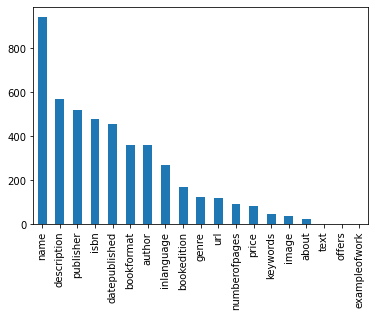

In [22]:
book_tableswod.name.value_counts().plot(kind='bar')

In [35]:
# 80 % train set, rest test set -> not right here, not that important at the moment

n = 80
train = book_tableswod.head(int(len(df)*(n/100)))

In [47]:
test = book_tableswod.iloc[2801: ]

In [48]:
train.shape

(2798, 2)

In [49]:
test.shape

(1864, 2)

Model 

In [25]:
from simpletransformers.classification import ClassificationModel

# Create a ClassificationModel
model = ClassificationModel('roberta', 'roberta-base', num_labels=19, use_cuda=False)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

In [51]:
model.train_model(train)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test)